In [1]:
# Import necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


### Reading the dataset

In [4]:
# Read the file "Boston_housing.csv" as a Pandas dataframe
df = pd.read_csv("Boston_housing.csv")
df.head()

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Predictors & Response variables

Select the following columns as predictors
- crim
- indus
- nox
- rm
- age
- dis
- rad
- tax
- ptratio
- black
- lstat

#### Select the 'medv' column as response variable

In [7]:
# Select a subdataframe of predictors mentioned above
X = df[['crim','indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']]

# Normalize the values of the dataframe 
X_norm = preprocessing.normalize(X, axis=0)

# Select medv as the response variable
y = df[['medv']]


### Split the dataset into train and validation sets


In [9]:
### edTest(test_random) ###
# Split the data into train and validation sets with 70% train data and
# random_state as 31
X_train, X_val, y_train, y_val = train_test_split(X_norm,y,random_state=31,train_size=0.7)


### Multi-linear Regression Analysis

In [10]:
# Initialize a Linear Regression model
lreg = LinearRegression()

# Fit the linear model on the train data
lreg.fit(X_train, y_train)

# Predict on the validation data
y_val_pred = lreg.predict(X_val)


In [11]:
# Use the mean_squared_error function to compute the validation mse
mse = mean_squared_error(y_val, y_val_pred)

# Print the MSE value
print ("Multi-linear regression validation MSE is", mse)


Multi-linear regression validation MSE is 21.581146124032514


### Obtaining the coefficients of the predictors

In [12]:
# Helper code to create a dictionary of the coefficients 
# along with the predictors as keys
lreg_coef = dict(zip(X.columns, np.transpose(lreg.coef_)))

# Linear regression coefficients for plotting
lreg_x = list(lreg_coef.keys())
lreg_y = list(lreg_coef.values())


### Implementing Lasso regularization

In [15]:
# Create a Lasso Regression model with alpha as 0.008
lasso_reg = Lasso(alpha=0.008)

# Fit the model on the train data
lasso_reg.fit(X_train, y_train)

# Predict on the validation data using the trained model
y_val_pred =lasso_reg.predict(X_val)


### Computing the MSE with Lasso regularization

In [16]:
# Calculate the validation MSE
mse_lasso = mean_squared_error(y_val, y_val_pred)

# Print the validation MSE
print ("Lasso validation MSE is", mse_lasso)


Lasso validation MSE is 26.059895644427694


In [17]:
# Hhelper code to make a dictionary of the predictors 
# along with the coefficients associated with them
lasso_coef = dict(zip(X.columns, np.transpose(lasso_reg.coef_))) 

# Get the Lasso regularisation coefficients for plotting
lasso_x = list(lasso_coef.keys())
lasso_y = list(lasso_coef.values())


### Implementing Ridge regularization

In [19]:
# Create a Ridge Regression model with alpha as 0.008
ridgeReg = Ridge(0.008)

# Fit the model on the train data
ridgeReg.fit(X_train, y_train)

# Predict the trained model on the validation data
y_val_pred = ridgeReg.predict(X_val)


### Computing the MSE with Ridge regularization

In [20]:
### edTest(test_mse) ###

# Calculate the validation MSE
mse_ridge = mean_squared_error(y_val, y_val_pred)

# Print he valdiation MSE
print ("Ridge validation MSE is", mse_ridge)


Ridge validation MSE is 23.01622701783856


### Obtaining the coefficients of the predictors

In [21]:
# Helper code to make a dictionary of the predictors 
# along with the coefficients associated with them 
ridge_coef = dict(zip(X.columns, np.transpose(ridgeReg.coef_))) 

# Ridge regularisation coefficients for plotting
ridge_x = list(ridge_coef.keys())
ridge_y = list(ridge_coef.values())


### Plotting the graph

In [28]:
np.asarray(lreg_x).reshape(-1,1), np.asarray(lreg_y).reshape(-1,1)

(array([['crim'],
        ['indus'],
        ['nox'],
        ['rm'],
        ['age'],
        ['dis'],
        ['rad'],
        ['tax'],
        ['ptratio'],
        ['black'],
        ['lstat']], dtype='<U7'),
 array([[ -25.00790407],
        [   3.27607624],
        [-191.10342561],
        [ 662.1406607 ],
        [ -13.91808257],
        [-127.49872838],
        [  83.359638  ],
        [ -99.07333868],
        [-437.34581171],
        [  80.49261603],
        [-163.72647884]]))

In [32]:
lreg_x=np.asarray(lreg_x).reshape(-1,1)
lreg_y=np.asarray(lreg_y).reshape(-1,1)

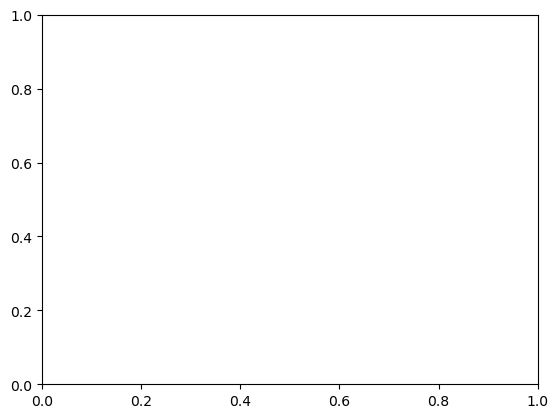

TypeError: unhashable type: 'numpy.ndarray'

In [33]:
# Helper code below to visualise your results

plt.rcdefaults()

plt.barh(lreg_x,lreg_y,1.0, align='edge',color="#D3B4B4", label="Linear Regression")
plt.barh(lasso_x,lasso_y,0.75 ,align='edge',color="#81BDB2",label = "Lasso regularisation")
plt.barh(ridge_x,ridge_y,0.25 ,align='edge',color="#7E7EC0", label="Ridge regularisation")
plt.grid(linewidth=0.2)
plt.xlabel("Coefficient")
plt.ylabel("Predictors")
plt.legend(loc='best')
plt.show()


# ⏸Pause and Think about it 

#### ⏸ How does the performance of Lasso and Ridge regression compare with that of Linear regression?

#### ⏸ Change the alpha values for both, Lasso and Ridge, to 1000. What happens to the coefficients?